# Data Exploration


This notebook explores the underlying data of the modeling task. The data is examined for missing and duplicate values. Further, the distributions of the features are explored and compared across negative and positive diagnoses. This helps in finding potential outliers and determining the correlation between single features and the respective diagnoses. Further, relationships between the features including combined predictive properties are explored.

These steps help in both preprocessing and modeling tasks as a deeper understanding of the underlying data helps in making proper decisions for feature selection, preprocessing, and hyperparameter tuning.

The available features are:
*   **radius**: mean of distances from center to points on the perimeter
*   **texture**: standard deviation of gray-scale values
*   **perimeter**: perimeter length
*   **area**: area of the nucleus
*   **compactness**: perimeter^2 / area - 1.0
*   **concavity**: severity of concave portions of the contour
*   **concave points**: number of concave portions of the contour
*   **symmetry**: symmetry of the nucleus
*   **fractal dimension**: "coastline approximation" - 1

[Dataset source](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [36]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "raw_data.csv")
df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  501 non-null    int64  
 1   Diagnosis           501 non-null    float64
 2   radius2             501 non-null    float64
 3   texture2            501 non-null    float64
 4   perimeter2          501 non-null    float64
 5   area2               501 non-null    float64
 6   compactness2        501 non-null    float64
 7   concavity2          501 non-null    float64
 8   concave_points2     501 non-null    float64
 9   symmetry2           501 non-null    float64
 10  fractal_dimension2  501 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 43.2 KB


The dataset does not contain any null values.


In [3]:
print(f"There are {df['ID'].unique().__len__()} unique samples in the dataset.")

There are 501 unique samples in the dataset.


In [4]:
print(f"There are {df[df.duplicated()].__len__()} exact duplicates in the dataset.")

There are 0 exact duplicates in the dataset.


## Set Dtypes


`ID` and `Diagnosis` columns should be treated as categories, as they represent identifiers and distinct classes respectively, not numerical quantities.


In [5]:
df["ID"] = df["ID"].astype("category")
df["Diagnosis"] = df["Diagnosis"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  501 non-null    category
 1   Diagnosis           501 non-null    category
 2   radius2             501 non-null    float64 
 3   texture2            501 non-null    float64 
 4   perimeter2          501 non-null    float64 
 5   area2               501 non-null    float64 
 6   compactness2        501 non-null    float64 
 7   concavity2          501 non-null    float64 
 8   concave_points2     501 non-null    float64 
 9   symmetry2           501 non-null    float64 
 10  fractal_dimension2  501 non-null    float64 
dtypes: category(2), float64(9)
memory usage: 57.0 KB


## Explore Label


In [ ]:
df["Diagnosis"].value_counts()

Diagnosis
0.0    320
1.0    181
Name: count, dtype: int64

Both categories contain a sufficient amount of samples.


## Explore Features


### Radius2


In [ ]:
df["radius2"].describe()

count    501.000000
mean       0.401941
std        0.280712
min        0.111500
25%        0.231500
50%        0.323700
75%        0.469700
max        2.873000
Name: radius2, dtype: float64

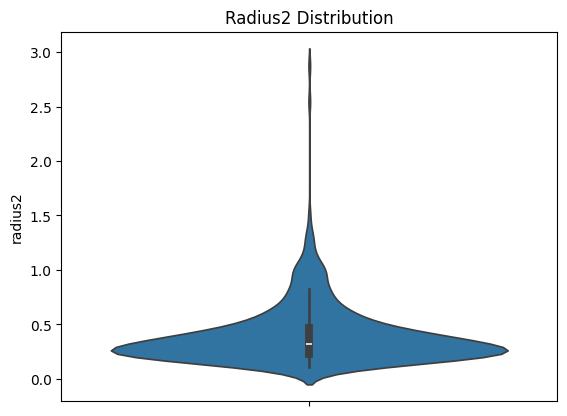

In [ ]:
fig = sns.violinplot(data=df["radius2"])
plt.title("Radius2 Distribution")
plt.show()

The `radius2` feature has a right-skewed distribution, with most values clustered below 0.5. The maximum value (2.873) is a significant deviation from the rest, contributing to high variance. This feature may benefit from outlier treatment or transformation before being used in modeling tasks.

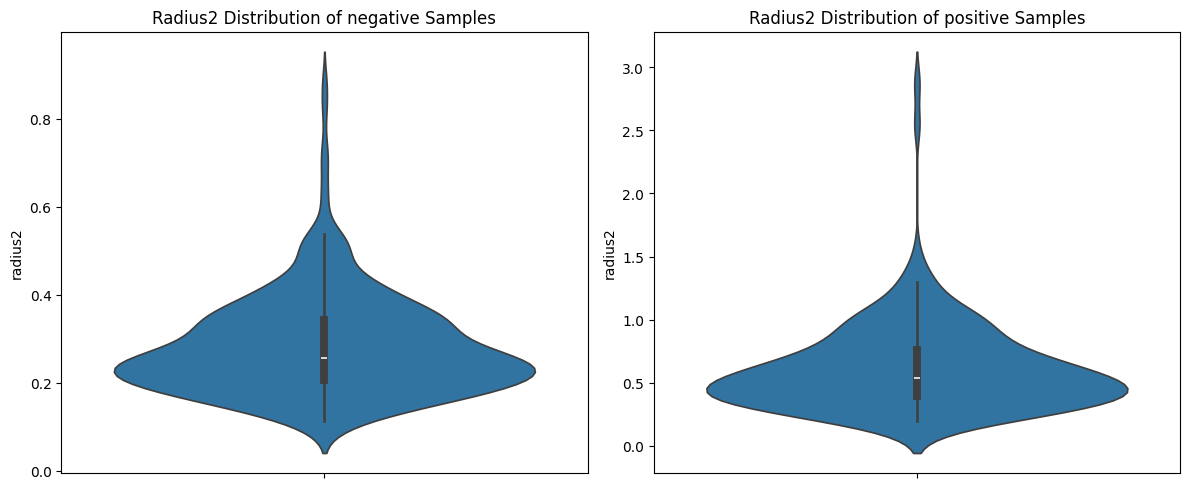

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
sns.violinplot(data=df["radius2"][df["Diagnosis"] == 0], ax=ax[0])
ax[0].set_title("Radius2 Distribution of negative Samples")
sns.violinplot(data=df["radius2"][df["Diagnosis"] == 1], ax=ax[1])
ax[1].set_title("Radius2 Distribution of positive Samples")
plt.tight_layout()
plt.show()

The distribution of `radius2` differs significantly between the two diagnosis classes. Higher values of `radius2` appear to be correlated with a positive diagnosis, while lower values are more common in negative samples. Outliers at the upper end of the `radius2` distribution are predominantly found in the positive diagnosis group. This indicates they might be valid data points reflecting characteristics of this group, rather than anomalies that need cleaning.

### Texture2

In [ ]:
df["texture2"].describe()

count    501.000000
mean       1.207266
std        0.553591
min        0.360200
25%        0.828200
50%        1.075000
75%        1.452000
max        4.885000
Name: texture2, dtype: float64

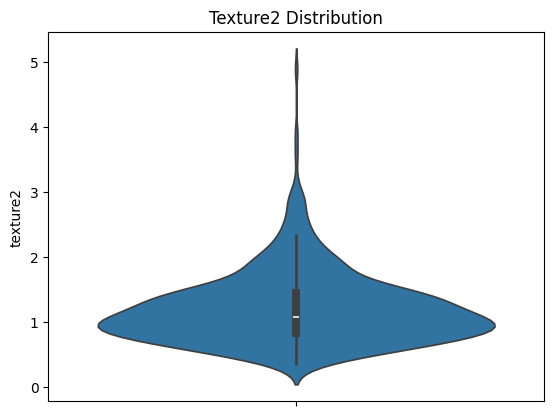

In [ ]:
fig = sns.violinplot(data=df["texture2"])
plt.title("Texture2 Distribution")
plt.show()

The `texture2` feature shows a slightly right-skewed distribution, with most values between 0.8 and 1.5. The mean is higher than the median, and a notably high maximum value (4.885) indicates possible outliers. While the overall spread is moderate, the long upper tail suggests that this feature may benefit from transformation or outlier mitigation in later analysis.

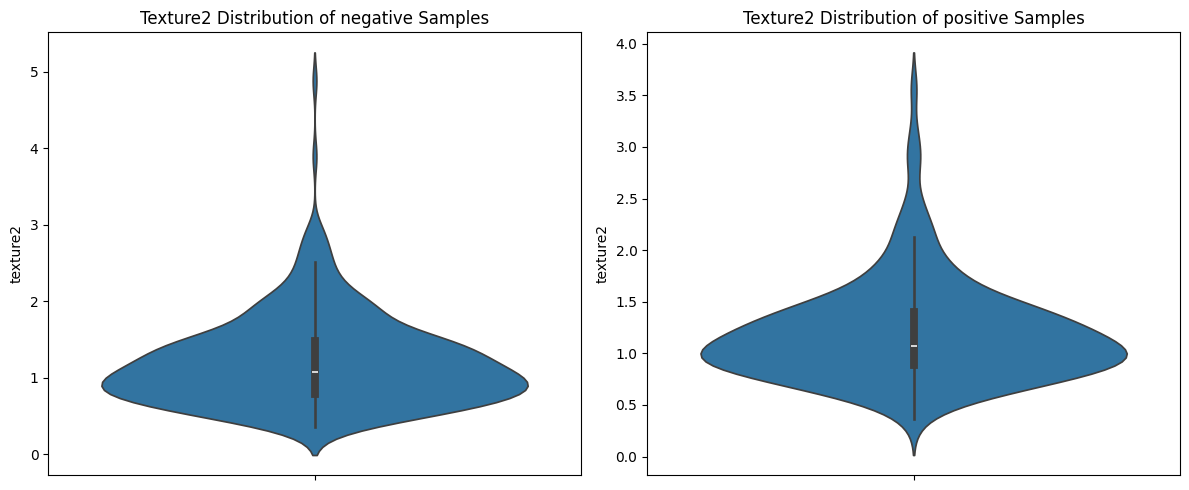

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
sns.violinplot(data=df["texture2"][df["Diagnosis"] == 0], ax=ax[0])
ax[0].set_title("Texture2 Distribution of negative Samples")
sns.violinplot(data=df["texture2"][df["Diagnosis"] == 1], ax=ax[1])
ax[1].set_title("Texture2 Distribution of positive Samples")
plt.tight_layout()
plt.show()

The distribution of `texture2` also differs between the two diagnosis classes, although the distinction is less pronounced. Specifically, higher values of `texture2` appear slightly more common in samples with a negative diagnosis. Conversely, the distribution for positive samples seems slightly shifted towards lower values. While potential outliers exist at the upper end of the overall distribution, they don't seem strongly concentrated within one specific diagnosis class, unlike the patterns observed for some other features. This suggests `texture2` might be a less powerful individual predictor compared to features showing more distinct separation between the classes.

### Perimeter2

In [ ]:
df["perimeter2"].describe()

count    501.000000
mean       2.848686
std        2.054928
min        0.757000
25%        1.597000
50%        2.279000
75%        3.283000
max       21.980000
Name: perimeter2, dtype: float64

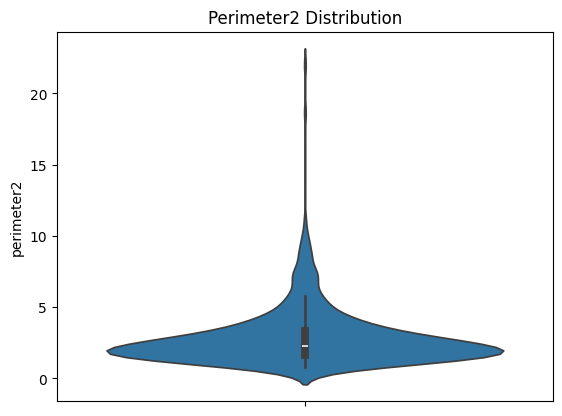

In [ ]:
fig = sns.violinplot(data=df["perimeter2"])
plt.title("Perimeter2 Distribution")
plt.show()

The `perimeter2` feature shows a strongly right-skewed distribution with high variability. While the bulk of values fall between 1.6 and 3.3, the maximum value of 21.980 indicates the presence of outliers.

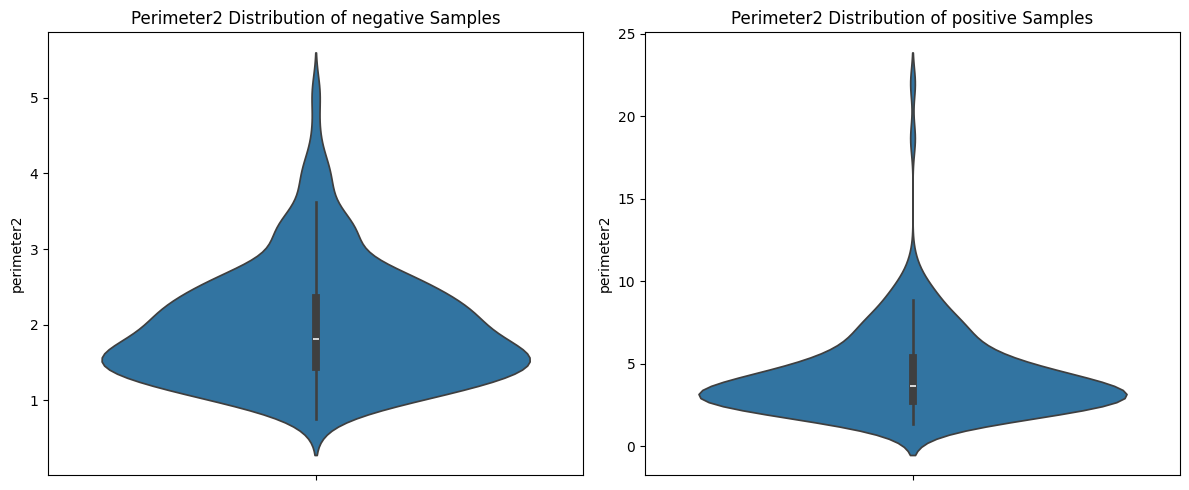

In [48]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
sns.violinplot(data=df["perimeter2"][df["Diagnosis"] == 0], ax=ax[0])
ax[0].set_title("Perimeter2 Distribution of negative Samples")
sns.violinplot(data=df["perimeter2"][df["Diagnosis"] == 1], ax=ax[1])
ax[1].set_title("Perimeter2 Distribution of positive Samples")
plt.tight_layout()
plt.show()

The distribution of `perimeter2` differs significantly between the two diagnosis classes. Higher values of `perimeter2` appear to be strongly correlated with a positive diagnosis, while lower values are more common in negative samples. The outliers previously observed at the higher end of the distribution appear to be more prevalent in the positive diagnosis group, suggesting they might represent genuine characteristics of this class rather than data errors requiring cleaning.

### Area2

In [49]:
df["area2"].describe()

count    501.000000
mean      39.865699
std       45.884414
min        6.802000
25%       17.610000
50%       24.440000
75%       44.740000
max      542.200000
Name: area2, dtype: float64

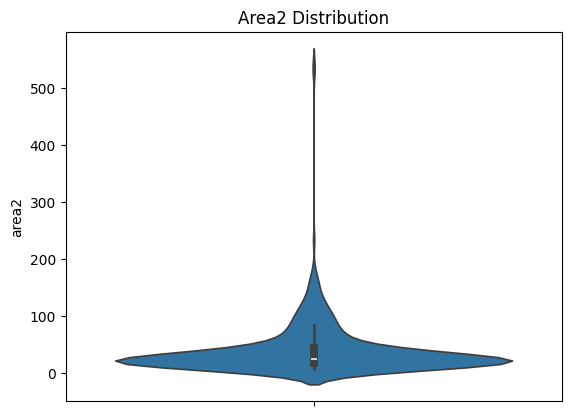

In [50]:
fig = sns.violinplot(data=df["area2"])
plt.title("Area2 Distribution")
plt.show()

The `area2` feature shows a strong right-skewed distribution with very high variability. Most values are concentrated between 17.6 and 44.7, but the maximum value of 542.2 is an extreme outlier, far exceeding the 75th percentile. Given the wide spread and skewness, preprocessing might be needed.

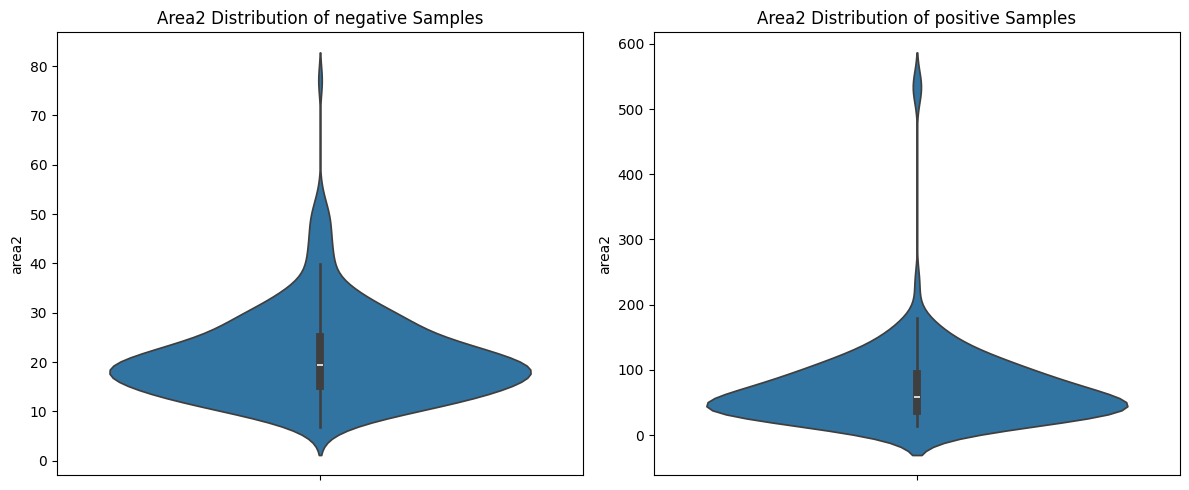

In [51]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
sns.violinplot(data=df["area2"][df["Diagnosis"] == 0], ax=ax[0])
ax[0].set_title("Area2 Distribution of negative Samples")
sns.violinplot(data=df["area2"][df["Diagnosis"] == 1], ax=ax[1])
ax[1].set_title("Area2 Distribution of positive Samples")
plt.tight_layout()
plt.show()

The `area2` feature shows a strong difference in distribution between the two diagnosis classes. Samples with higher `area2` values are strongly associated with a positive diagnosis, while lower values are more typical of negative cases. Outliers at the upper end of the `area2` distribution are predominantly found in the positive diagnosis group, suggesting these may represent genuine characteristics of this class rather than data errors.

### Compactness2

In [52]:
df["compactness2"].describe()

count    501.000000
mean       0.025259
std        0.017995
min        0.002252
25%        0.012850
50%        0.019890
75%        0.032030
max        0.135400
Name: compactness2, dtype: float64

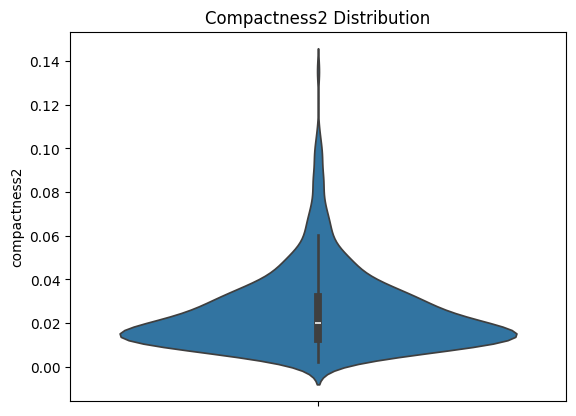

In [53]:
fig = sns.violinplot(data=df["compactness2"])
plt.title("Compactness2 Distribution")
plt.show()

The `compactness2` feature displays a right-skewed distribution with most values concentrated in the lower range between 0.0129 and 0.0320. The maximum value (0.1354) is notably larger than the upper quartile, suggesting the presence of outliers. Although the overall spread is relatively small, the skewness and upper tail may benefit from scaling or outlier detection prior to model training.

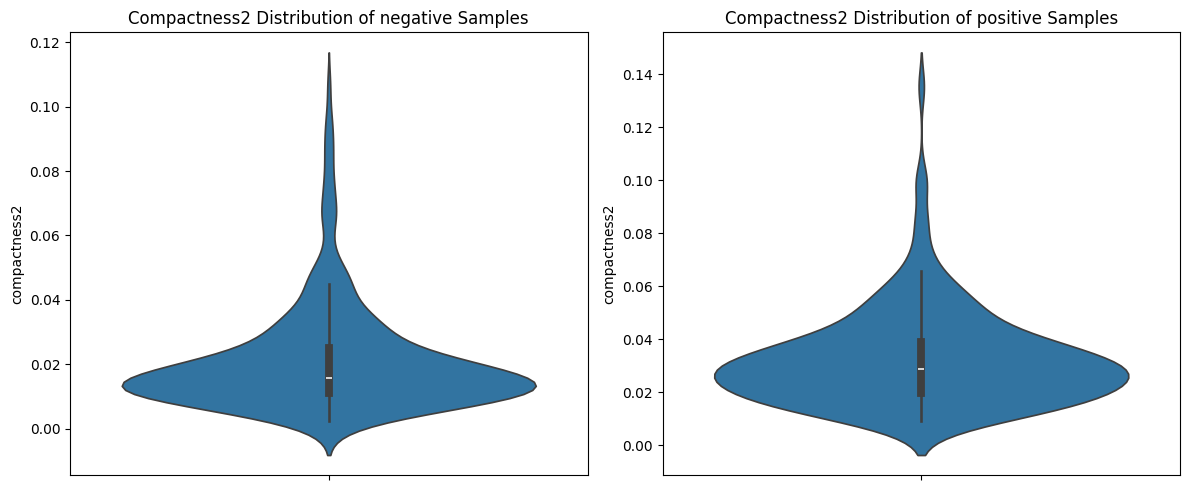

In [54]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
sns.violinplot(data=df["compactness2"][df["Diagnosis"] == 0], ax=ax[0])
ax[0].set_title("Compactness2 Distribution of negative Samples")
sns.violinplot(data=df["compactness2"][df["Diagnosis"] == 1], ax=ax[1])
ax[1].set_title("Compactness2 Distribution of positive Samples")
plt.tight_layout()
plt.show()

While the distribution of `compactness2` differs between the two diagnosis classes, the separation is not as pronounced as observed for other features. Higher values of `compactness2` are somewhat more common in positive diagnosis samples, but there is considerable overlap between the classes. This suggests that `compactness2` may have only a weak individual correlation with the diagnosis outcome and might be less effective as a standalone predictor.

### Concavity2

In [55]:
df["concavity2"].describe()

count    501.000000
mean       0.031707
std        0.031182
min        0.000000
25%        0.014520
50%        0.025090
75%        0.040620
max        0.396000
Name: concavity2, dtype: float64

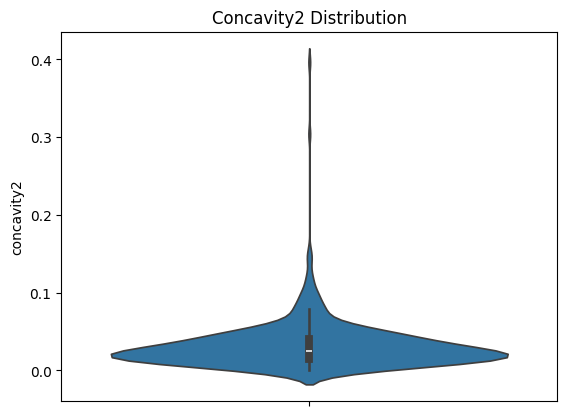

In [56]:
fig = sns.violinplot(data=df["concavity2"])
plt.title("Concavity2 Distribution")
plt.show()

The `concavity2` feature has a right-skewed distribution, with most values falling between 0.0145 and 0.0406. The maximum value (0.3960) is significantly higher than the 75th percentile, marking the presence of strong outliers. The minimum value is 0, suggesting some instances with no concavity at all.

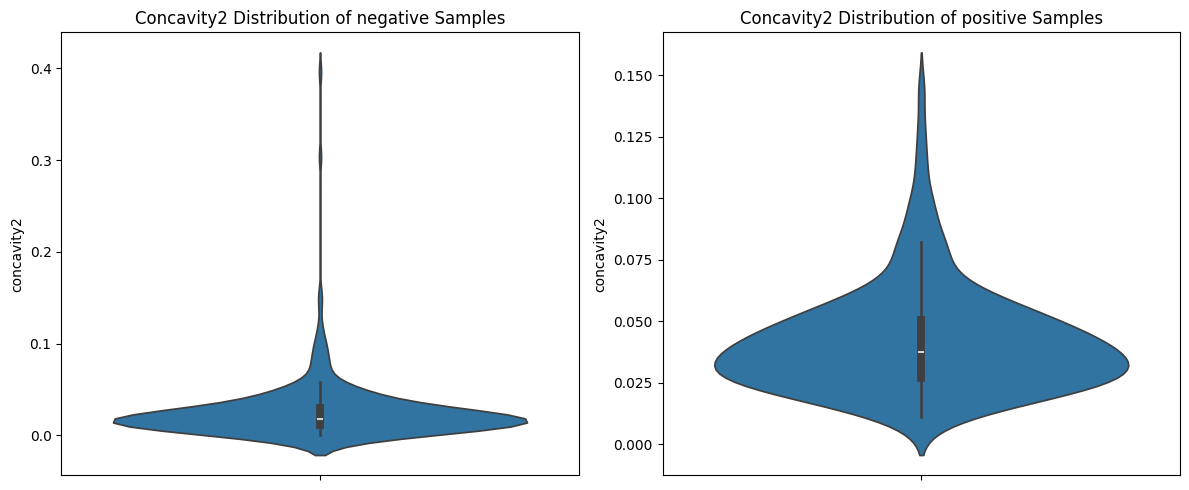

In [57]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
sns.violinplot(data=df["concavity2"][df["Diagnosis"] == 0], ax=ax[0])
ax[0].set_title("Concavity2 Distribution of negative Samples")
sns.violinplot(data=df["concavity2"][df["Diagnosis"] == 1], ax=ax[1])
ax[1].set_title("Concavity2 Distribution of positive Samples")
plt.tight_layout()
plt.show()

The values for the `concavity2` feature are strongly skewed to the higher echelon in the negative samples compared to the positive samples. This indicates a strong correlation between this feature and the label.

### Concave_points2

In [58]:
df["concave_points2"].describe()

count    501.000000
mean       0.011736
std        0.006306
min        0.000000
25%        0.007591
50%        0.010750
75%        0.014500
max        0.052790
Name: concave_points2, dtype: float64

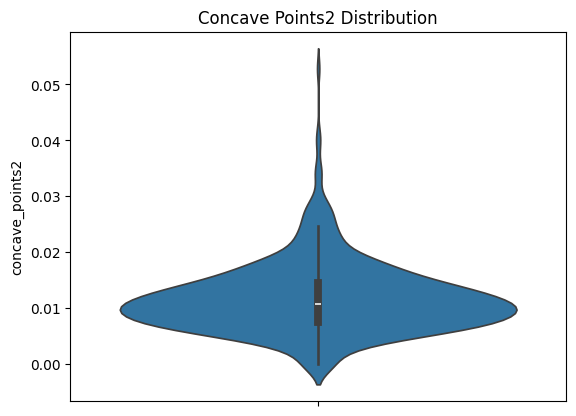

In [60]:
fig = sns.violinplot(data=df["concave_points2"])
plt.title("Concave Points2 Distribution")
plt.show()

The `concave_points2` feature shows a right-skewed distribution with most values tightly clustered between 0.0076 and 0.0145. The maximum value (0.0528) stands out as a potential outlier, especially relative to the narrow interquartile range. The minimum value is 0, suggesting that some samples have no concave points at all.

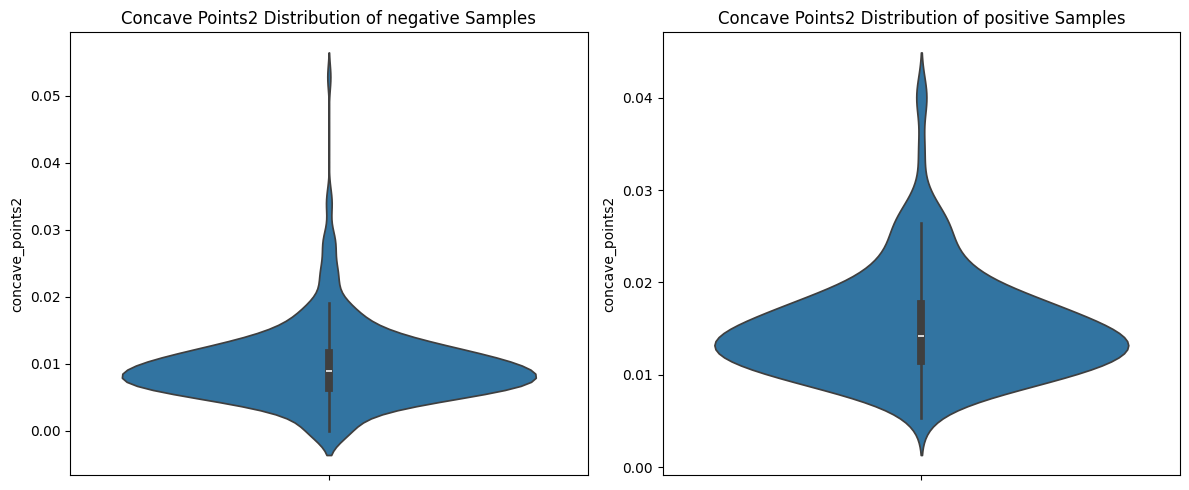

In [61]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
sns.violinplot(data=df["concave_points2"][df["Diagnosis"] == 0], ax=ax[0])
ax[0].set_title("Concave Points2 Distribution of negative Samples")
sns.violinplot(data=df["concave_points2"][df["Diagnosis"] == 1], ax=ax[1])
ax[1].set_title("Concave Points2 Distribution of positive Samples")
plt.tight_layout()
plt.show()

The positive samples seem to feature `concave_points2` more concentrated towards the middle of the spectrum. Higher values seem to be correlated to a negative Diagnosis. However, the median of negative samples is lower than of positive samples. Also, the IQR of negative samples is tighter and located at a lower range, even though the overall range of the `concave_points2` feature is higher in negative samples.

### Symmetry2

In [62]:
df["symmetry2"].describe()

count    501.000000
mean       0.020431
std        0.008385
min        0.007882
25%        0.015000
50%        0.018650
75%        0.022920
max        0.078950
Name: symmetry2, dtype: float64

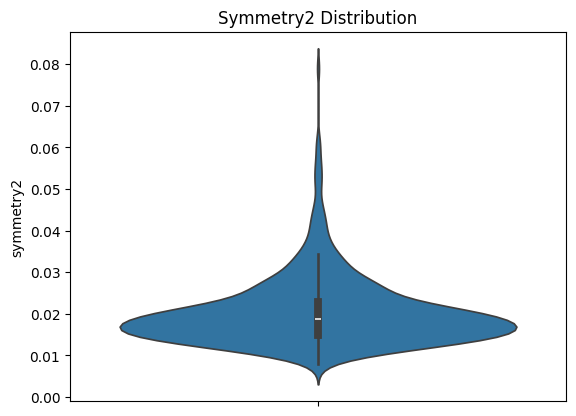

In [63]:
fig = sns.violinplot(data=df["symmetry2"])
plt.title("Symmetry2 Distribution")
plt.show()

The `symmetry2` feature demonstrates a slightly right-skewed distribution, with most values ranging between 0.0150 and 0.0229. The maximum value (0.0790) is considerably larger than the rest and may be treated as an outlier, especially given the compact interquartile range. The low standard deviation (0.0084) reflects a generally tight clustering of values, though skewness and extreme values should still be considered during preprocessing.

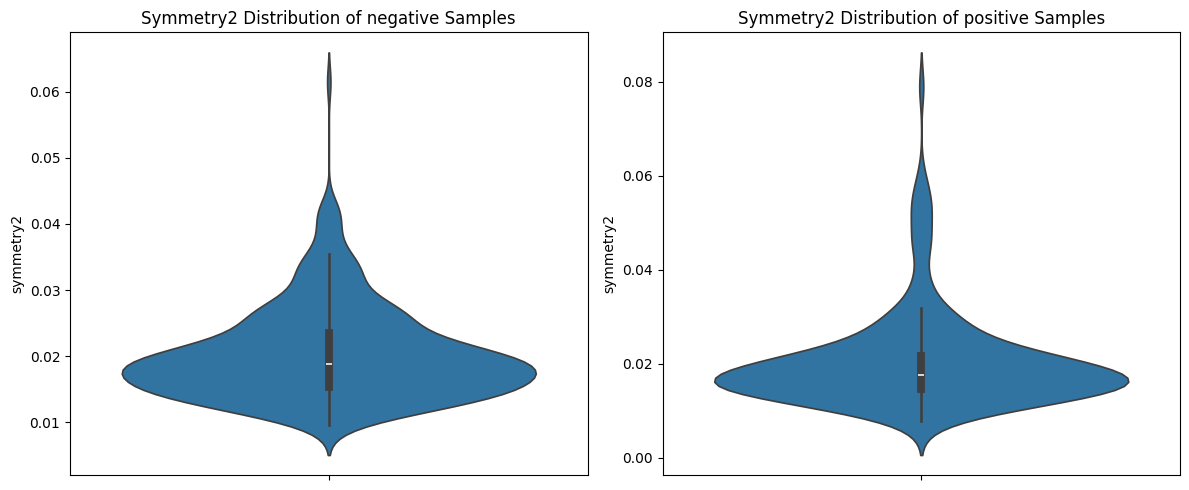

In [64]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
sns.violinplot(data=df["symmetry2"][df["Diagnosis"] == 0], ax=ax[0])
ax[0].set_title("Symmetry2 Distribution of negative Samples")
sns.violinplot(data=df["symmetry2"][df["Diagnosis"] == 1], ax=ax[1])
ax[1].set_title("Symmetry2 Distribution of positive Samples")
plt.tight_layout()
plt.show()

The `symmetry2` feature exhibits similar distribution in the lower and middle ranges across negative and positive samples. However, higher values seem to be strongly correlated to a positive diagnosis.

### Fractal Dimension2

In [65]:
df["fractal_dimension2"].describe()

count    501.000000
mean       0.003793
std        0.002720
min        0.000895
25%        0.002234
50%        0.003130
75%        0.004476
max        0.029840
Name: fractal_dimension2, dtype: float64

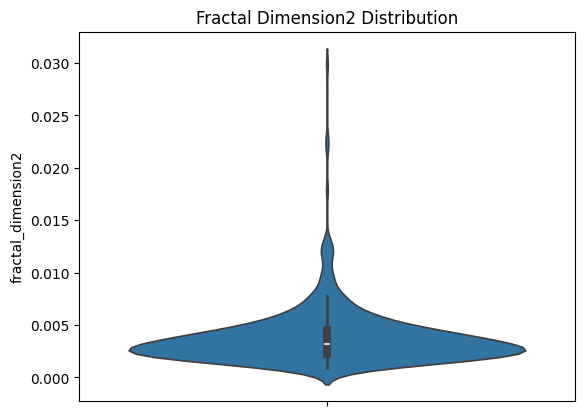

In [66]:
fig = sns.violinplot(data=df["fractal_dimension2"])
plt.title("Fractal Dimension2 Distribution")
plt.show()

The `fractal_dimension2` feature has a strong right-skewed distribution, with most values concentrated between 0.0022 and 0.0045. The maximum value (0.0298) is an extreme outlier relative to the rest of the distribution, especially given the small scale of the data and the low standard deviation (0.0027). This suggests that while most observations are tightly grouped, a few outliers could heavily influence the distribution.

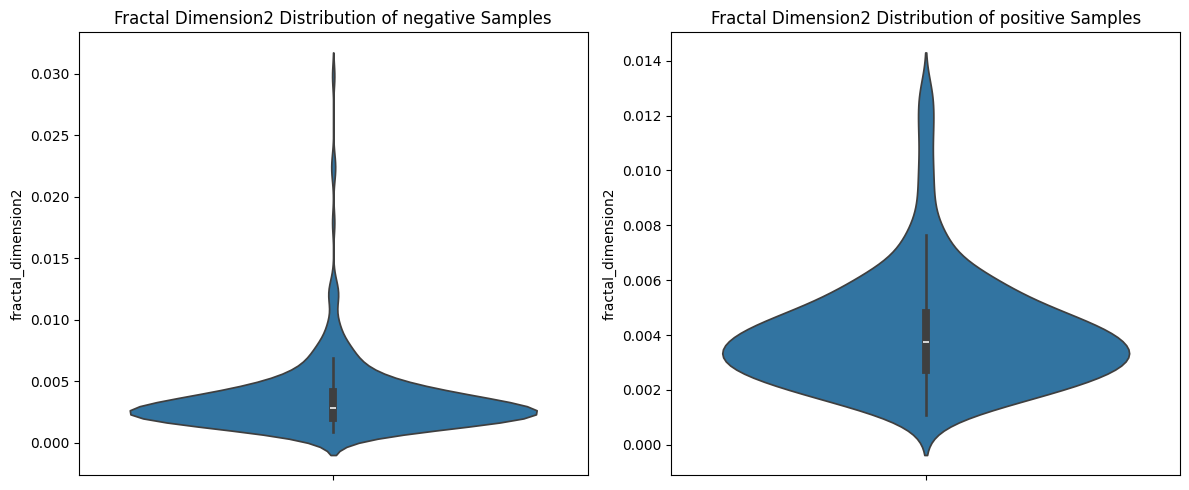

In [67]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
sns.violinplot(data=df["fractal_dimension2"][df["Diagnosis"] == 0], ax=ax[0])
ax[0].set_title("Fractal Dimension2 Distribution of negative Samples")
sns.violinplot(data=df["fractal_dimension2"][df["Diagnosis"] == 1], ax=ax[1])
ax[1].set_title("Fractal Dimension2 Distribution of positive Samples")
plt.tight_layout()
plt.show()

Higher values in the `fractal_dimension2` feature seem to be correlated to a negative diagnosis. Still, in the middle and lower ranges the distributions across negative and positive samples are very similar.

## Explore Relationships

The following section focuses on exploring relationships between the features and their combined correlation to the target.

### Concavity

The below section explores the relationships and combined predictive properties of features related to the concavity of the nucleus. In this context, concavity-related features are considered to be `concavity2` and `concave_points2`. 

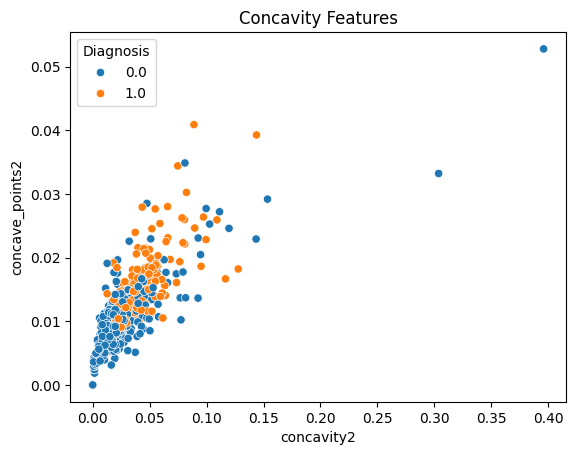

In [8]:
fig = sns.scatterplot(data=df, x="concavity2", y="concave_points2", hue="Diagnosis")
fig.set_title("Concavity Features")
plt.show()

There is a visible positive correlation between the number and severity of concave points. Low values in both features strongly correlate to a negative diagnosis. However, high values are not necessarily a strong predictor for a positive diagnosis.

### Look

The below section explores the relationships and combined predictive properties of features related to the surface looks of the nucleus. In this context, looks-related features are considered to be `texture2`, `symmetry2`, and `fractal_dimension2`. 

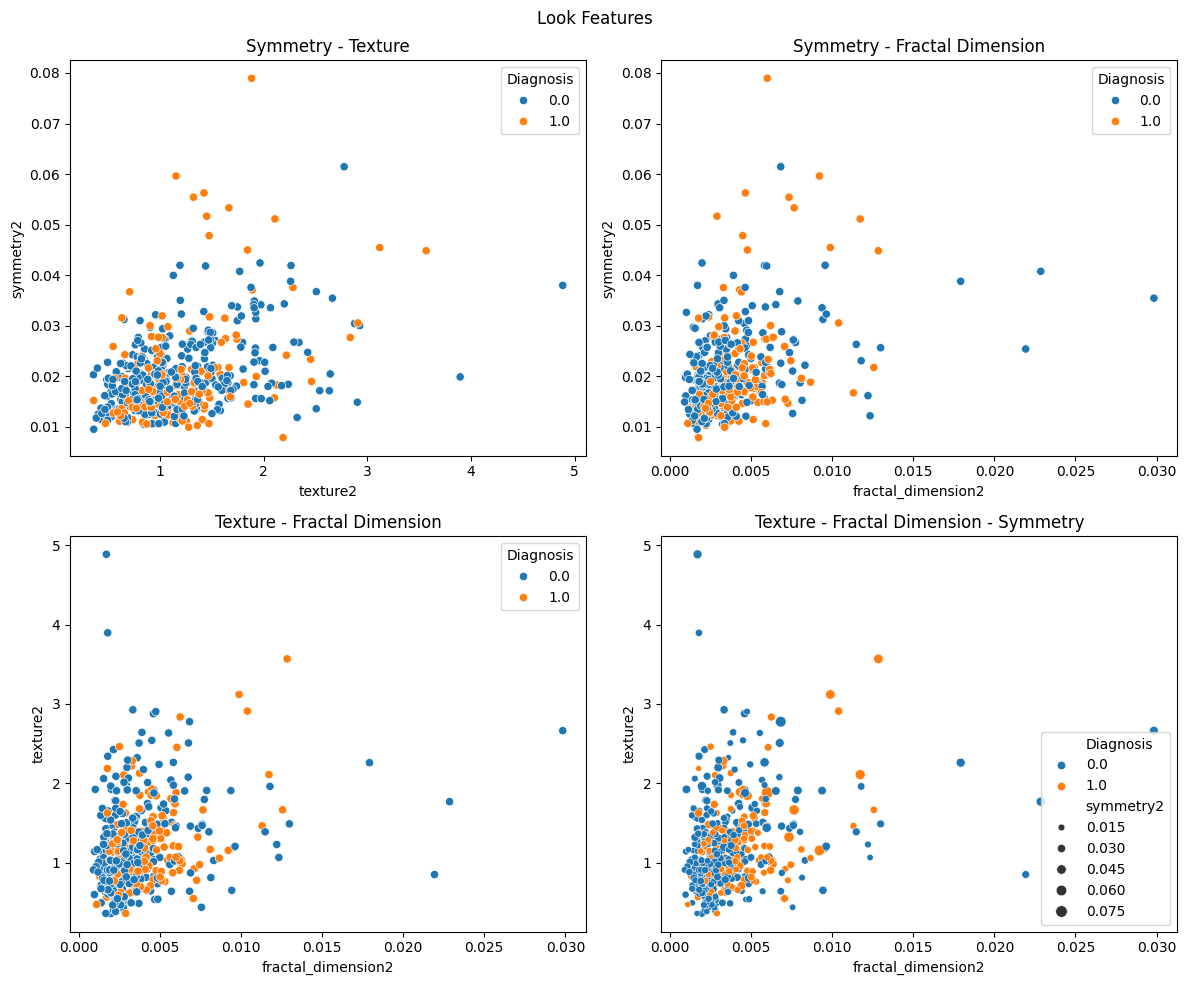

In [51]:
fig, ax = plt.subplots(2, 2, figsize=[12, 10])
fig.suptitle("Look Features")

ax[0, 0] = sns.scatterplot(
    data=df, x="texture2", y="symmetry2", hue="Diagnosis", ax=ax[0, 0]
)
ax[0, 0].set_title("Symmetry - Texture")

ax[0, 1] = sns.scatterplot(
    data=df, x="fractal_dimension2", y="symmetry2", hue="Diagnosis", ax=ax[0, 1]
)
ax[0, 1].set_title("Symmetry - Fractal Dimension")

ax[1, 0] = sns.scatterplot(
    data=df, x="fractal_dimension2", y="texture2", hue="Diagnosis", ax=ax[1, 0]
)
ax[1, 0].set_title("Texture - Fractal Dimension")

ax[1, 1] = sns.scatterplot(
    data=df,
    x="fractal_dimension2",
    y="texture2",
    hue="Diagnosis",
    size="symmetry2",
    ax=ax[1, 1],
)
ax[1, 1].set_title("Texture - Fractal Dimension - Symmetry")

plt.tight_layout()
plt.show()

There is very little observable correlation between the look-related features (`texture2`, `symmetry2`, and `fractal_dimension2`). Their pairwise relationships do not reveal any clear patterns or clusters that would help distinguish between the diagnosis classes. As a result, the combined predictive value of these features for the diagnosis appears to be very low, if it exists at all. This suggests that, while these features may capture certain aspects of the nucleus surface, they are not strong individual or joint predictors for the classification task in this dataset.

### Size

The below section explores the relationships and combined predictive properties of features related to the size of the nucleus. In this context, size-related features are considered to be `radius2`, `area2`, `perimeter2`, and `compactness2`. 

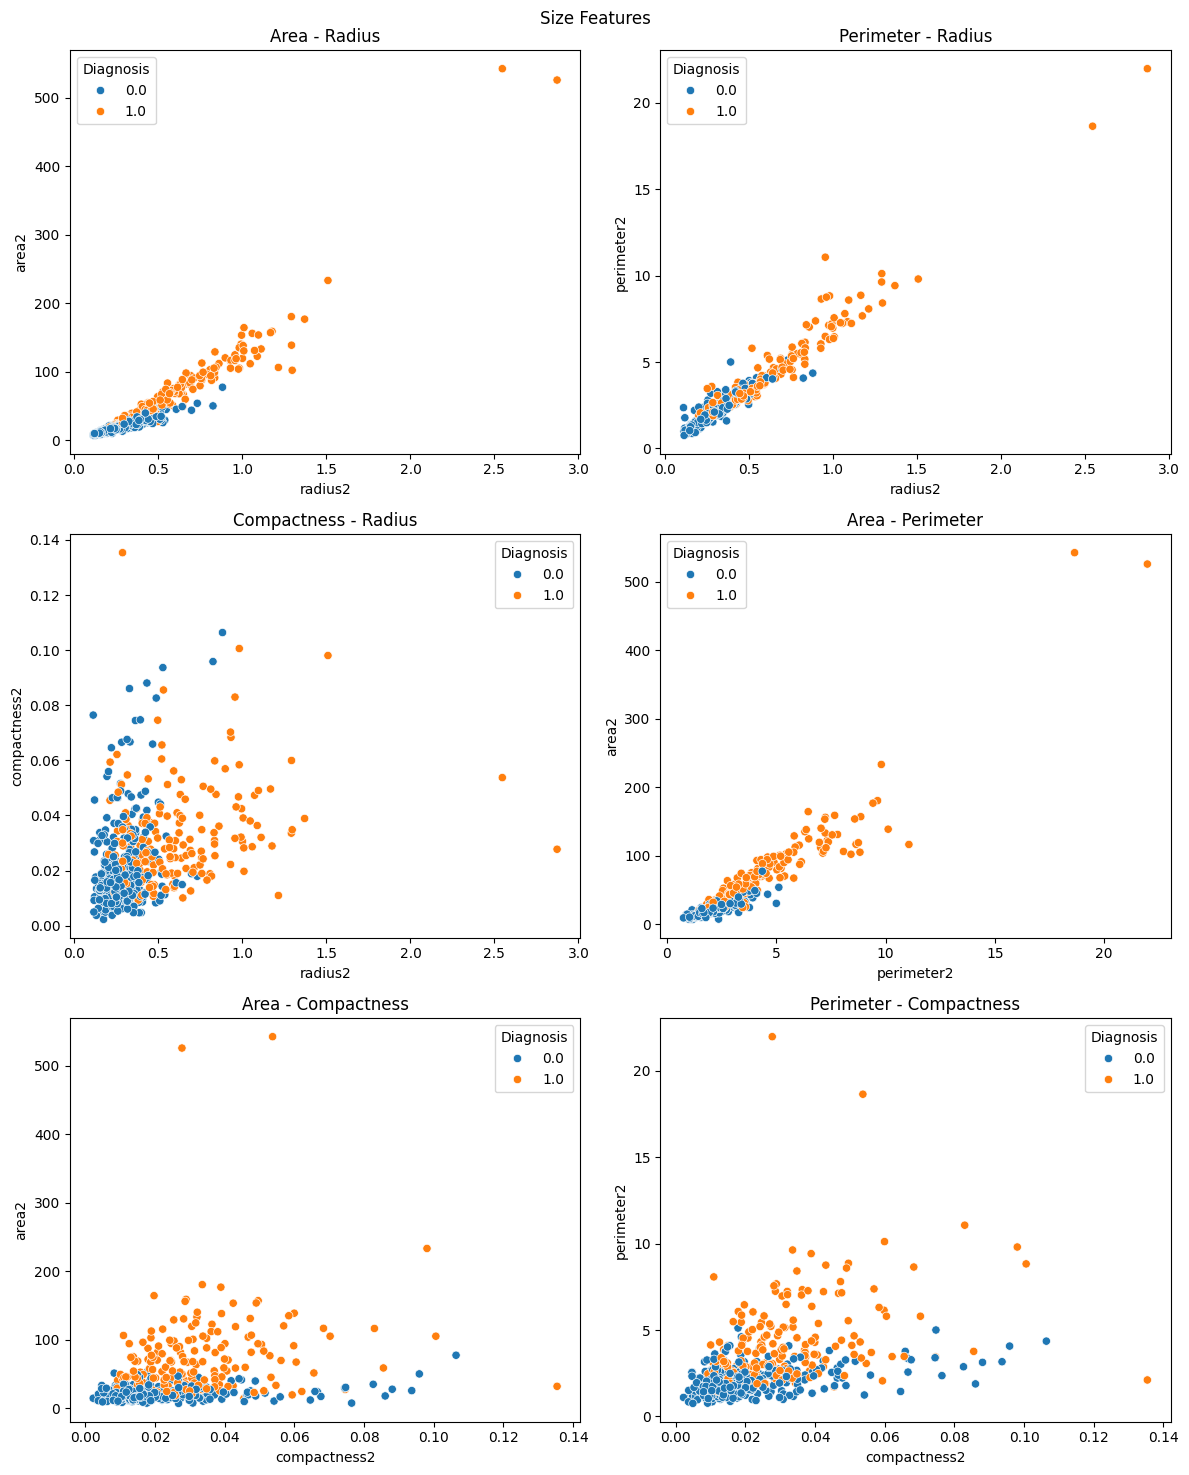

In [33]:
fig, ax = plt.subplots(3, 2, figsize=[12, 15])
fig.suptitle("Size Features")

ax[0, 0] = sns.scatterplot(
    data=df, x="radius2", y="area2", hue="Diagnosis", ax=ax[0, 0]
)
ax[0, 0].set_title("Area - Radius")

ax[0, 1] = sns.scatterplot(
    data=df, x="radius2", y="perimeter2", hue="Diagnosis", ax=ax[0, 1]
)
ax[0, 1].set_title("Perimeter - Radius")

ax[1, 0] = sns.scatterplot(
    data=df, x="radius2", y="compactness2", hue="Diagnosis", ax=ax[1, 0]
)
ax[1, 0].set_title("Compactness - Radius")

ax[1, 1] = sns.scatterplot(
    data=df, x="perimeter2", y="area2", hue="Diagnosis", ax=ax[1, 1]
)
ax[1, 1].set_title("Area - Perimeter")

ax[2, 0] = sns.scatterplot(
    data=df, x="compactness2", y="area2", hue="Diagnosis", ax=ax[2, 0]
)
ax[2, 0].set_title("Area - Compactness")

ax[2, 1] = sns.scatterplot(
    data=df, x="compactness2", y="perimeter2", hue="Diagnosis", ax=ax[2, 1]
)
ax[2, 1].set_title("Perimeter - Compactness")

plt.tight_layout()
plt.show()

`area2`, `radius2`, and `perimeter2` all show strong positive correlations to each other as well as strong predictive properties to the diagnosis. `compactness2` is derived from `area2` and `perimeter2` and consequently assumably does not add a lot of value in a multivariate analysis where both of the primitive features are also present. This assumption is supported by the plots, which show less separation between diagnosis classes explained by the compactness feature.

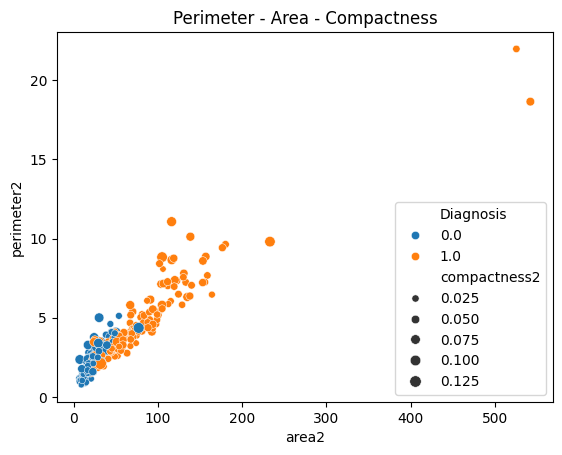

In [53]:
fig = sns.scatterplot(
    data=df, x="area2", y="perimeter2", hue="Diagnosis", size="compactness2"
)
fig.set_title("Perimeter - Area - Compactness")
plt.show()

The before made assumption of the weak predictive properties of the `compactness2` feature is further supported by the above plot, which shows that the combination of the `perimeter2` and `area2` features are better predictors than the `compactness2` feature. Consequently, the `compactness2` feature will be excluded from further analysis to minimize the risk of adding noise or overfitting the model to these derived properties. Retaining the primitive features enables the model to capture a broader range of potential relationships between them.

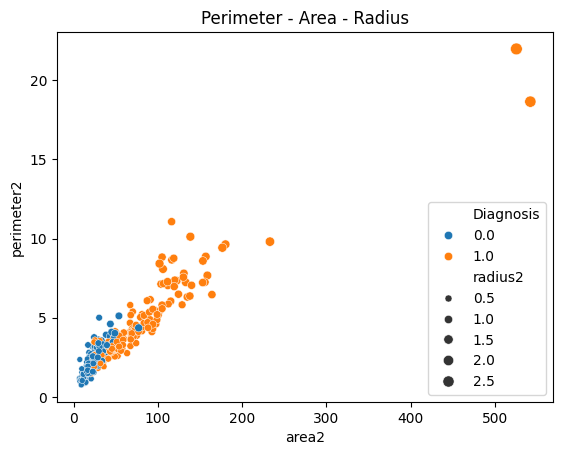

In [52]:
fig = sns.scatterplot(
    data=df, x="area2", y="perimeter2", hue="Diagnosis", size="radius2"
)
fig.set_title("Perimeter - Area - Radius")
plt.show()

There is clear visible correlation between the size-related features as well as visible separation in all three dimensions, suggesting that each feature adds valuable information in a multivariate analysis.

### Size - Concavity

The below section explores the relationships and combined predictive properties of features related to the size and concavity of the nucleus. PCA is used to reduce these feature groups into one-dimensional features respectively.

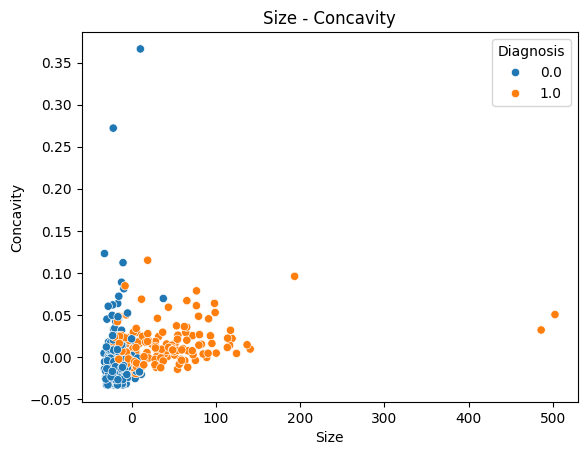

In [54]:
size = df[["radius2", "area2", "perimeter2"]]
pca = PCA(n_components=1, random_state=42)
size = pca.fit_transform(size).ravel()

concavity = df[["concavity2", "concave_points2"]]
pca = PCA(n_components=1, random_state=42)
concavity = pca.fit_transform(concavity).ravel()

fig = sns.scatterplot(x=size, y=concavity, hue=df["Diagnosis"])
fig.set_title("Size - Concavity")
fig.set_xlabel("Size")
fig.set_ylabel("Concavity")
plt.show()

### Look - Size - Concavity

The below section explores the relationships and combined predictive properties of singular features related to the looks as well as combined features related to size and concavity of the nucleus. PCA is used to reduce these feature groups into one-dimensional features respectively.

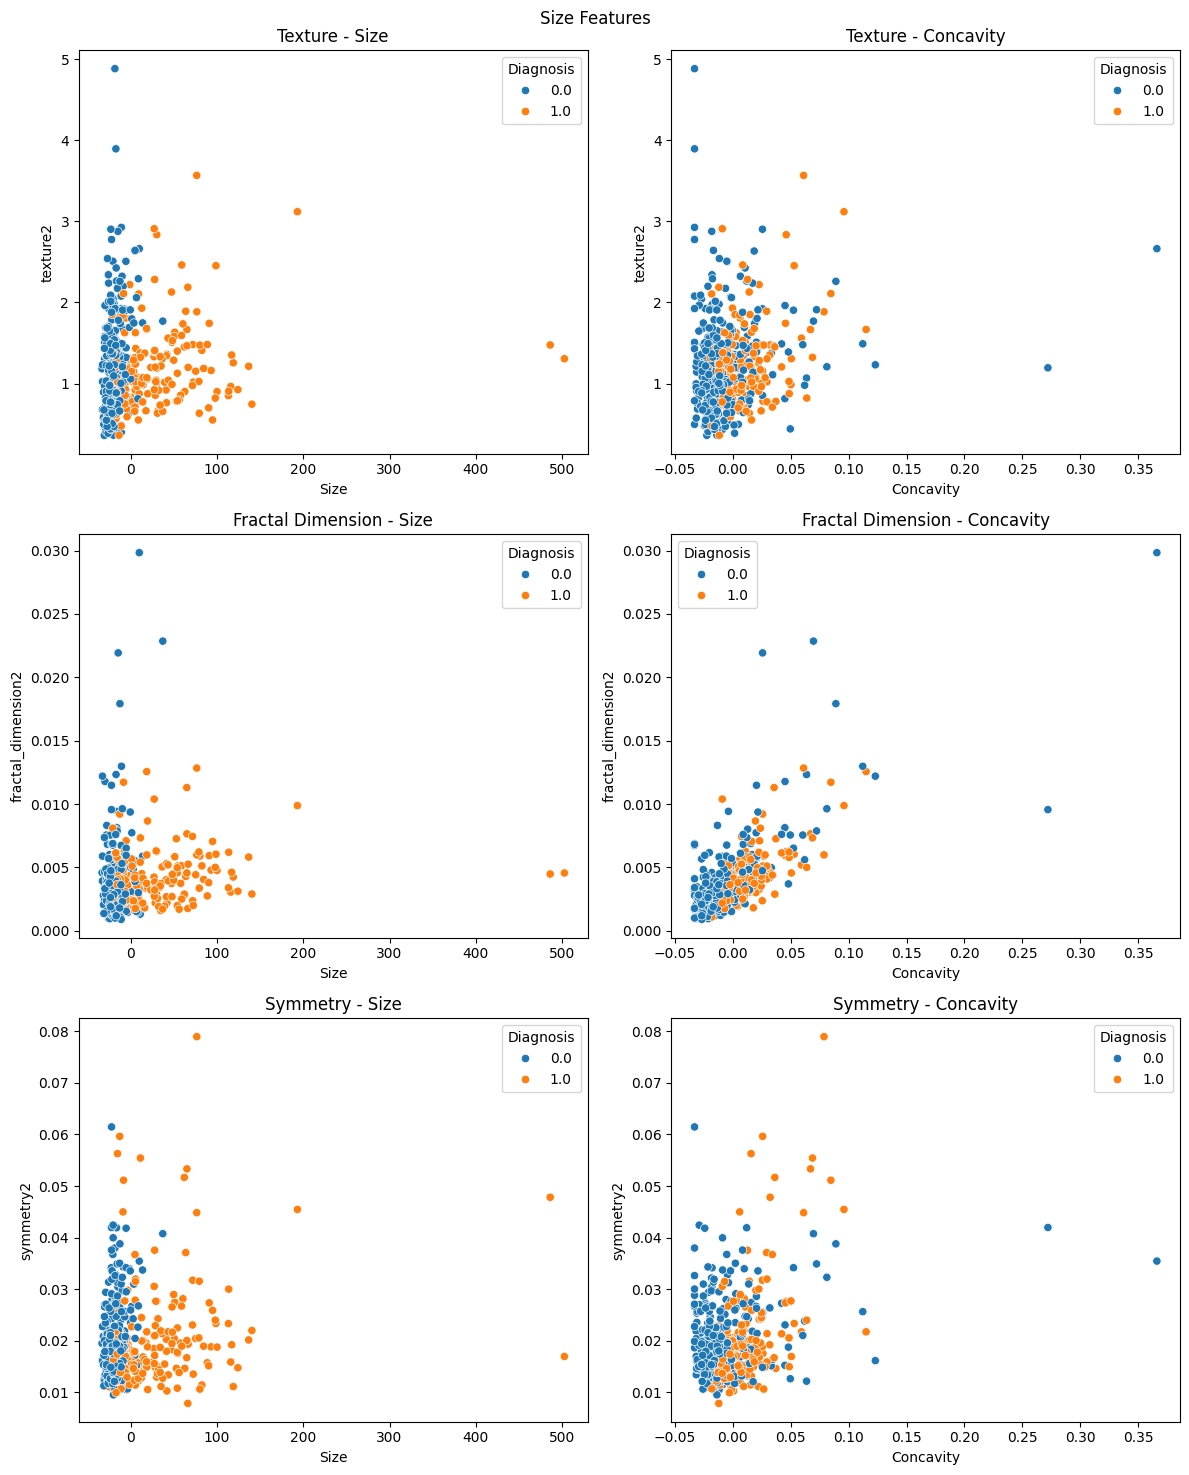

In [57]:
size = df[["radius2", "area2", "perimeter2"]]
pca = PCA(n_components=1, random_state=42)
size = pca.fit_transform(size).ravel()

concavity = df[["concavity2", "concave_points2"]]
pca = PCA(n_components=1, random_state=42)
concavity = pca.fit_transform(concavity).ravel()

fig, ax = plt.subplots(3, 2, figsize=[12, 15])
fig.suptitle("Size Features")

ax[0, 0] = sns.scatterplot(data=df, x=size, y="texture2", hue="Diagnosis", ax=ax[0, 0])
ax[0, 0].set_xlabel("Size")
ax[0, 0].set_title("Texture - Size")

ax[0, 1] = sns.scatterplot(
    data=df, x=concavity, y="texture2", hue="Diagnosis", ax=ax[0, 1]
)
ax[0, 1].set_xlabel("Concavity")
ax[0, 1].set_title("Texture - Concavity")

ax[1, 0] = sns.scatterplot(
    data=df, x=size, y="fractal_dimension2", hue="Diagnosis", ax=ax[1, 0]
)
ax[1, 0].set_xlabel("Size")
ax[1, 0].set_title("Fractal Dimension - Size")

ax[1, 1] = sns.scatterplot(
    data=df, x=concavity, y="fractal_dimension2", hue="Diagnosis", ax=ax[1, 1]
)
ax[1, 1].set_xlabel("Concavity")
ax[1, 1].set_title("Fractal Dimension - Concavity")

ax[2, 0] = sns.scatterplot(data=df, x=size, y="symmetry2", hue="Diagnosis", ax=ax[2, 0])
ax[2, 0].set_xlabel("Size")
ax[2, 0].set_title("Symmetry - Size")

ax[2, 1] = sns.scatterplot(
    data=df, x=concavity, y="symmetry2", hue="Diagnosis", ax=ax[2, 1]
)
ax[2, 1].set_xlabel("Concavity")
ax[2, 1].set_title("Symmetry - Concavity")

plt.tight_layout()
plt.show()

`texture2` shows limited separation power. In both the `size` and `concavity` plots, `texture2` values are narrowly distributed and overlap between negative and positive samples. While `size` and `concavity` vary more between classes, `texture2` remains relatively uniform.

`fractal_dimension2` does not clearly separate the classes when plotted against `size`. However, a slight positive trend with `concavity` is visible, especially for positive samples. This may reflect increased shape irregularity, but the feature is weak on its own.

`symmetry2` shows little distinction between classes. Most samples fall within a small `symmetry2` range, regardless of `size` or `concavity`. Like `fractal_dimension2`, it may add minor value when used alongside stronger features.

## Summary

**Data Integrity:**
The dataset contains no missing values and only a negligible number of exact duplicates.

**Class Balance:**
Both diagnosis classes are well represented, ensuring a balanced dataset for modeling.

**Individual Feature Analysis:**
*   **Distributions:** Most features exhibit right-skewed distributions with varying degrees of outliers, particularly at the upper end. Features such as `radius2`, `perimeter2`, and `area2` show strong positive skewness and high variance.
*   **Class Separation:** Several individual features, including `radius2`, `perimeter2`, and `area2`, display clear differences in distribution between the diagnosis classes, indicating strong predictive potential. Other features, like `compactness2` and `texture2`, show more overlap and may be less powerful as standalone predictors.
*   **Outliers:** Outliers are present in many features. Their prevalence in specific diagnosis groups (e.g., higher values of size and concavity features in positive samples) suggests they may represent genuine characteristics rather than data errors requiring removal.
*   **Correlation with Diagnosis:** Features such as `radius2`, `perimeter2`, `area2`, and `symmetry2` are strongly associated with a positive diagnosis, while higher values of `fractal_dimension2` and `concavity2` are more common in negative samples.

**Feature Group Analysis:**
*   **Size Features** (`radius2`, `perimeter2`, `area2`): These features are highly inter-correlated and demonstrate strong combined predictive power. Higher values strongly indicate a positive diagnosis.
*   **Concavity Features** (`concavity2`, `concave_points2`): These features are positively correlated. Low values strongly suggest a negative diagnosis. They offer moderate combined predictive value.
*   **Look Features** (`texture2`, `symmetry2`, `fractal_dimension2`): These features show weak inter-correlations and limited combined ability to separate the diagnosis classes. Their overall predictive contribution appears low.
*   **Feature Selection**: The `compactness2` feature showed weaker class separation compared to `area2` and `perimeter2` (from which it's derived) and will be excluded to reduce redundancy.